In [17]:
# Alle Variablen löschen ohne zu fragen.
# Hierdurch werden Seiteneffekte vermieden.
%reset -f

In [18]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from   sklearn    import datasets

In [19]:
# Wiedrholbarer Zufall
np.random.seed(42)

In [20]:
def logistic(x):
    z = (1/(1+np.exp(-x)))
    return z
    
    
def Neuron(x, w, b):
    z = w[0] * x[0] + w[1] * x[1] + b
    y = logistic(z)
    return y

In [21]:
# Iris-Datensatz laden ...

iris = datasets.load_iris()

# Länge und Breite des Blütenblattes laden
# und die ersten 5 Werte ausgeben
x    = iris["data"][:, (2,3)]  
print('x = \n',x[0:5])
print()

# Typklasse der Lilienart festlegen
# "Iris virginica" --> 1, 
# "Iris setosa un Iris versicolor" --> 0
t    = (iris["target"]==2).astype(np.int) 
print('t = \n',t)
print()

# Anzahl der Datensätze
n = np.size(t)

print('x.shape =', x.shape)
print('t.shape =', t.shape)
print()
print('Anzahl der Datensätze  =', n)



x = 
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]

t = 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]

x.shape = (150, 2)
t.shape = (150,)

Anzahl der Datensätze  = 150


In [22]:
# Standardisierung der Daten

# Hier geht es los .........

In [23]:
print("Mittelwert   x = ", np.mean(x, axis=0))
print("Standardabw. x = ", np.var(x, axis=0))

Mittelwert   x =  [3.758      1.19933333]
Standardabw. x =  [3.09550267 0.57713289]


In [24]:
# Minimum und Maximum der Daten finden
# (um später die Datenpunkte gut darstellen zu können)

# Hier geht es los .........
xMin = np.min(x[:, 1])
print('xMin =', xMin)
xMax = np.max(x[:, 1])
print('xMax =', xMax)

xMin = 0.1
xMax = 2.5


In [25]:
# Parameter und Variablen anlegen
# und initialisieren
eta    = 0.1
epochs = 15000

# Fehlervektor anlegen
E = np.zeros(epochs)

# Gewichte und Bias anlegen und initialisieren
w = 1*(np.random.rand(2)-0.5)
b = 0
print('w.shape =', w.shape)
print('E.shape =', E.shape)

w.shape = (2,)
E.shape = (15000,)


In [31]:
# Training des Neurons
for i in range(0,epochs):
    # Zufallsindex erzeugen
    # Hier geht es los .........
    idx = np.int(np.floor(n*np.random.rand(1,1)))
    # Forward
    # Hier geht es los .........
    yc = Neuron(x[idx], w, b)
    tc = t[idx]
    # Backprop von w und b mit quad. Fehler
    # Hier geht es los .........
    sensitivity = (yc-tc) * yc * (1-yc)
    w = w -eta  * sensitivity* x[idx]
    b = b - eta * sensitivity
    # Backprop mit Crossentropy
    # Hier geht es los .........
    
    # Berechnung des aktuellen Fehlers E[i]
    # Hier geht es los .........
    E[i] = 0.5 * (tc -yc)**2
print('E.shape =', E.shape)
E = np.array(E)
print(E[14999])


E.shape = (15000,)
3.0118242885731142e-05


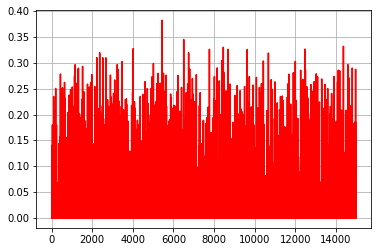

In [33]:
# Glättung der Fehlerwerte über 50 Werte
# Hier geht es los .........
masksize = n
kernel   = np.ones(n)/n

E_glatt = np.convolve(E, kernel, mode='valid')
# Plotten des Fehlerverlaufs
# Hier geht es los .........
xgrid = np.linspace(0, 15000, 15000)
plt.plot(xgrid, E, 'red')
plt.grid()

# Beispiel:
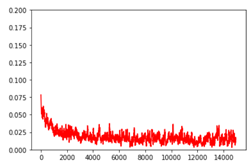

In [12]:
# Erzeugen der x- und y-Werte eines zweidimensionalen
# Gitters für die Darstellung des Eingangsvektorraumes
# im Bereich xmin bis xmax mit 100 Zwischenpositionen

# Hier geht es los .........)

# Berechnung der Neuronen-Ausgabewerte Z für
# alle Gitterpunkte

# Hier geht es los .........

print('Z.shape     =', Z.shape) # Anm.: (100,100)

xgrid.shape = (100,)
XGrid.shape = (100, 100)
Z.shape     = (100, 100)


In [10]:
# Darstellung des Eingangsvektorraumes (cmap='coolwarm') ....

# Hier geht es los .........

# ... und Einzeichnen der Datenpunkte 
# ("iris virginica" --> schwarz, "alle anderen" --> weiss)

# Hier geht es los .........

# Beispiel:
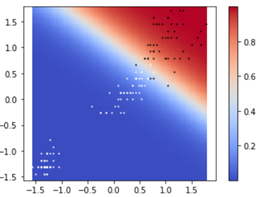